#Ejercicio 1
En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv
y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.


#### Dataset camas covid

In [280]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv')
data.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN


In [281]:
data = data.sort_values(by=['fecha'])
data.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
87,1,2020-06-30,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN


In [282]:
data.reset_index(inplace=True)
data.head()

,index,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,87,1,2020-06-30,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN
1,86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
2,85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
3,84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
4,83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN


In [283]:
subset = data.iloc[:, 4:-1] 
subset.head()

,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
0,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3
1,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3
2,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3
3,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3
4,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3


##### *Hay variables que puedan ser razonablemente consideradas normales?*

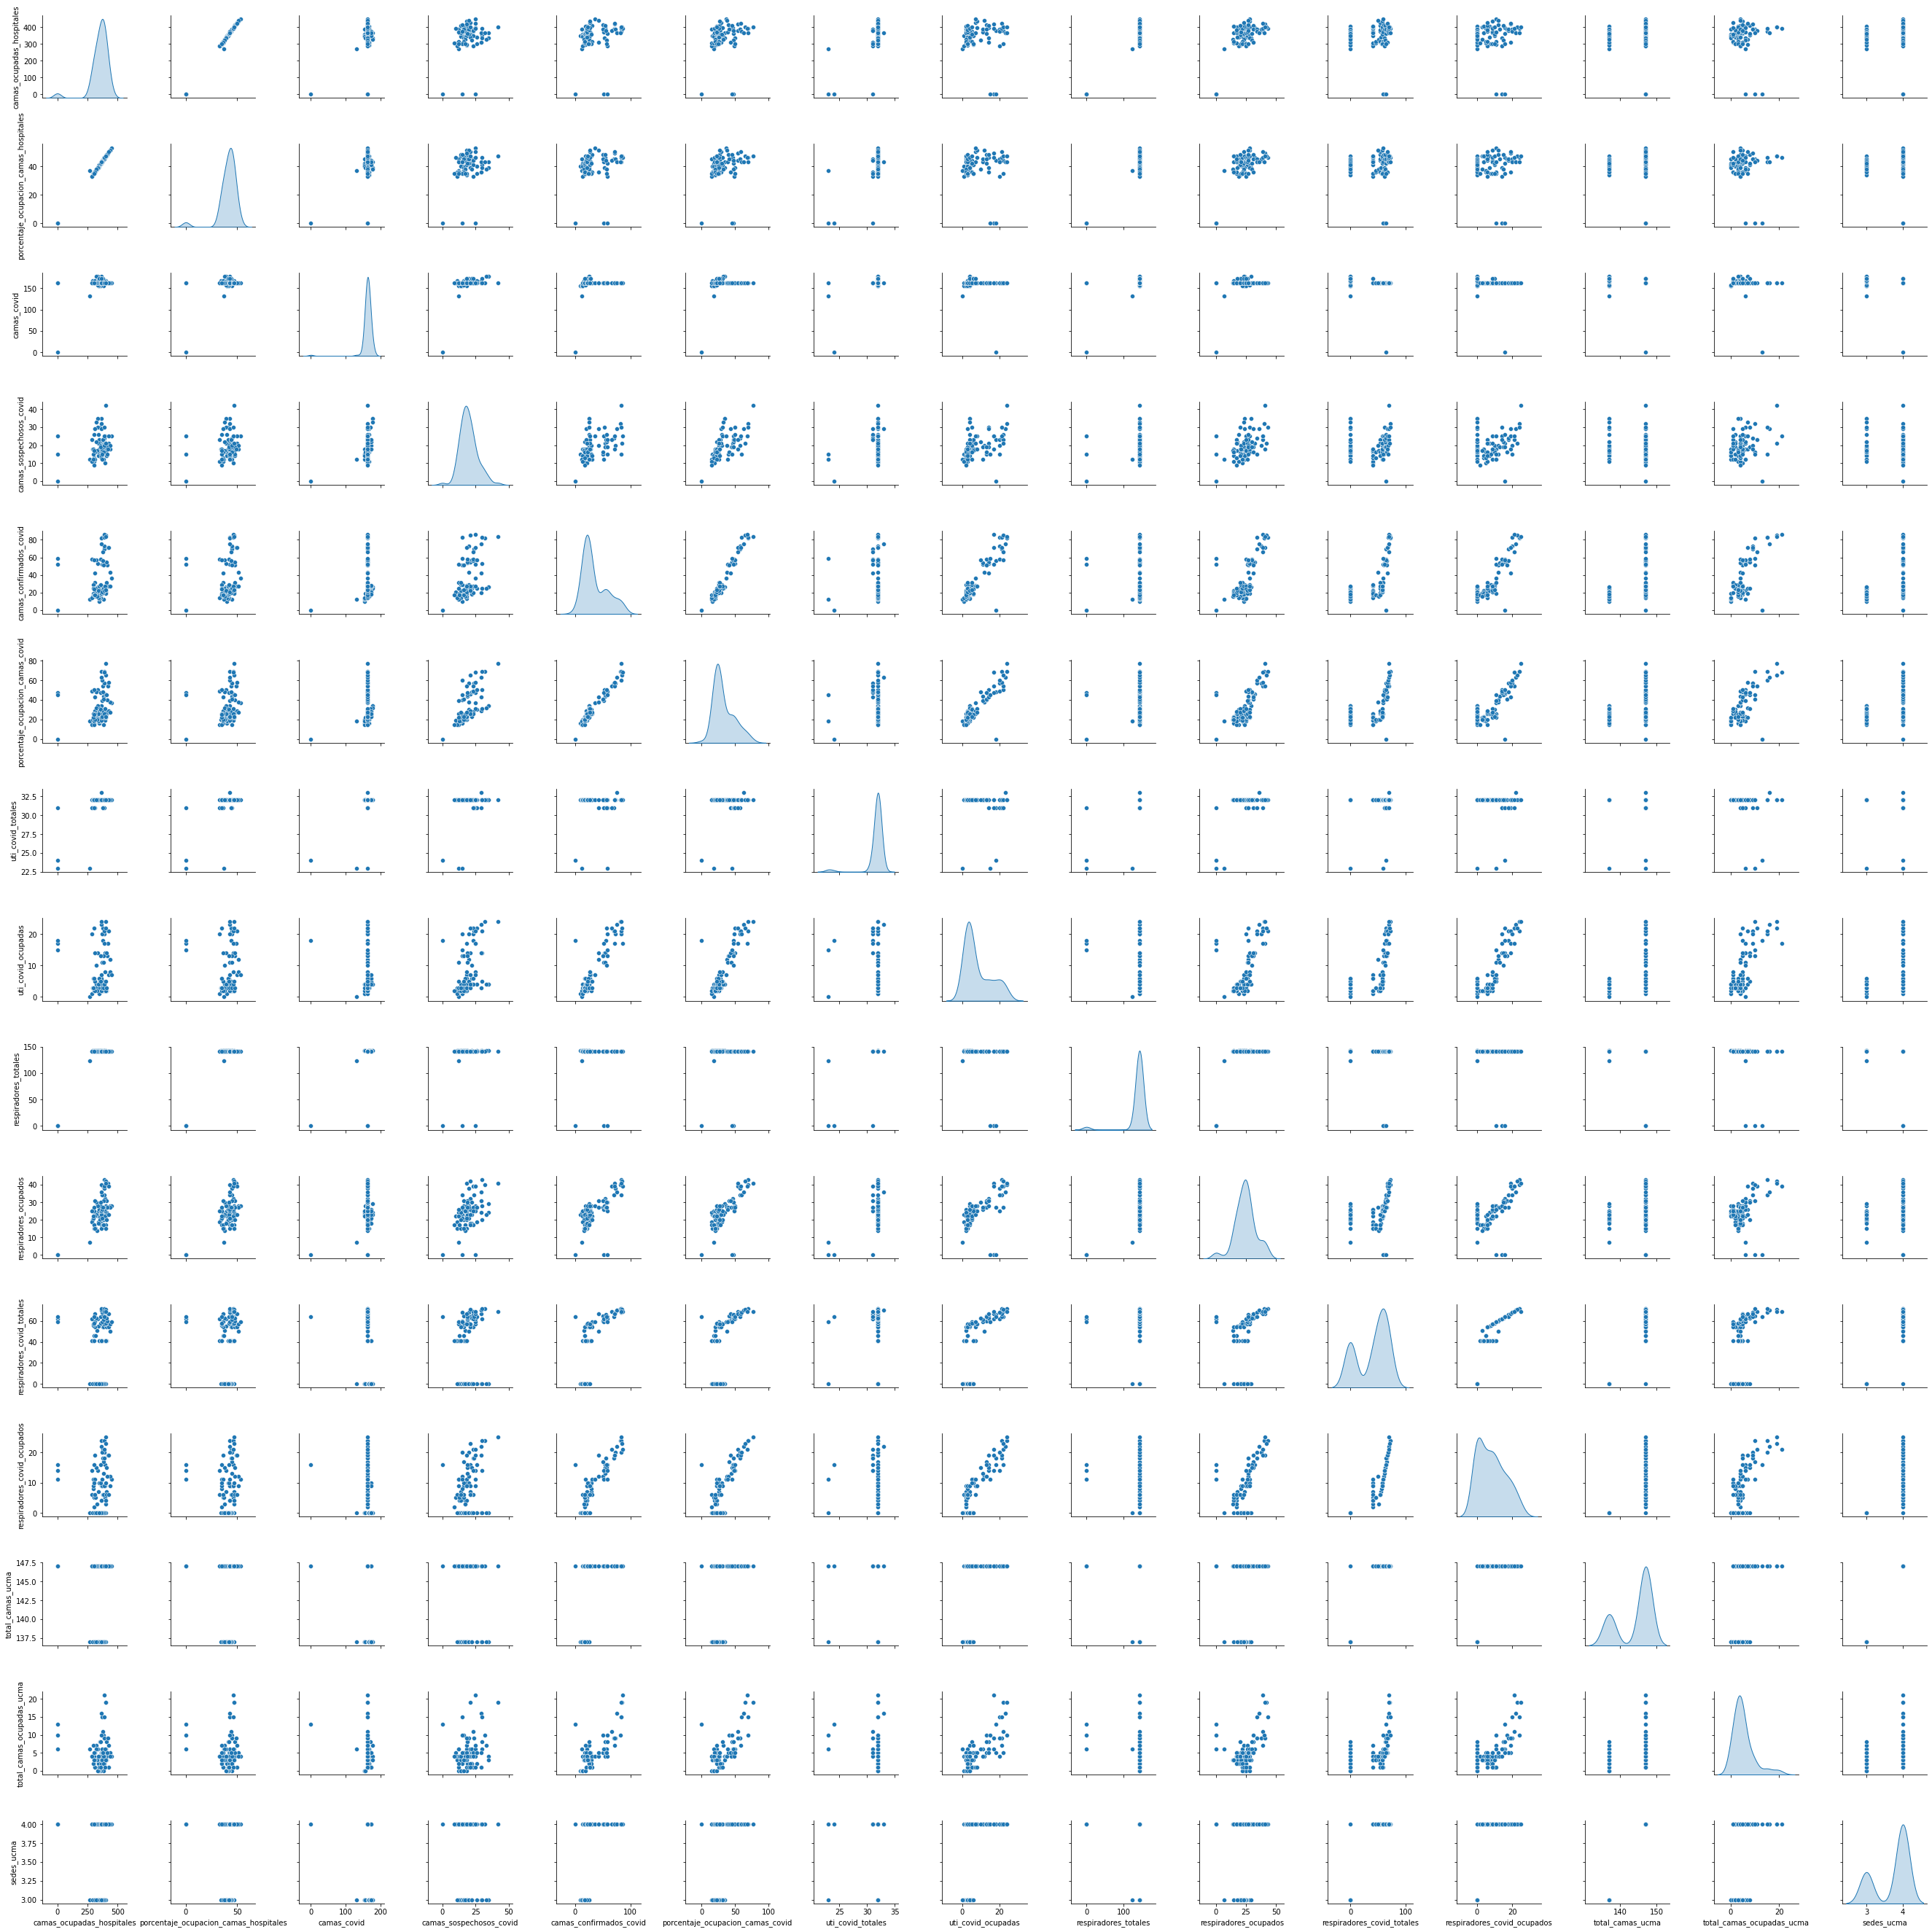

In [276]:
import seaborn as sns

sns.pairplot(subset, diag_kind="kde")


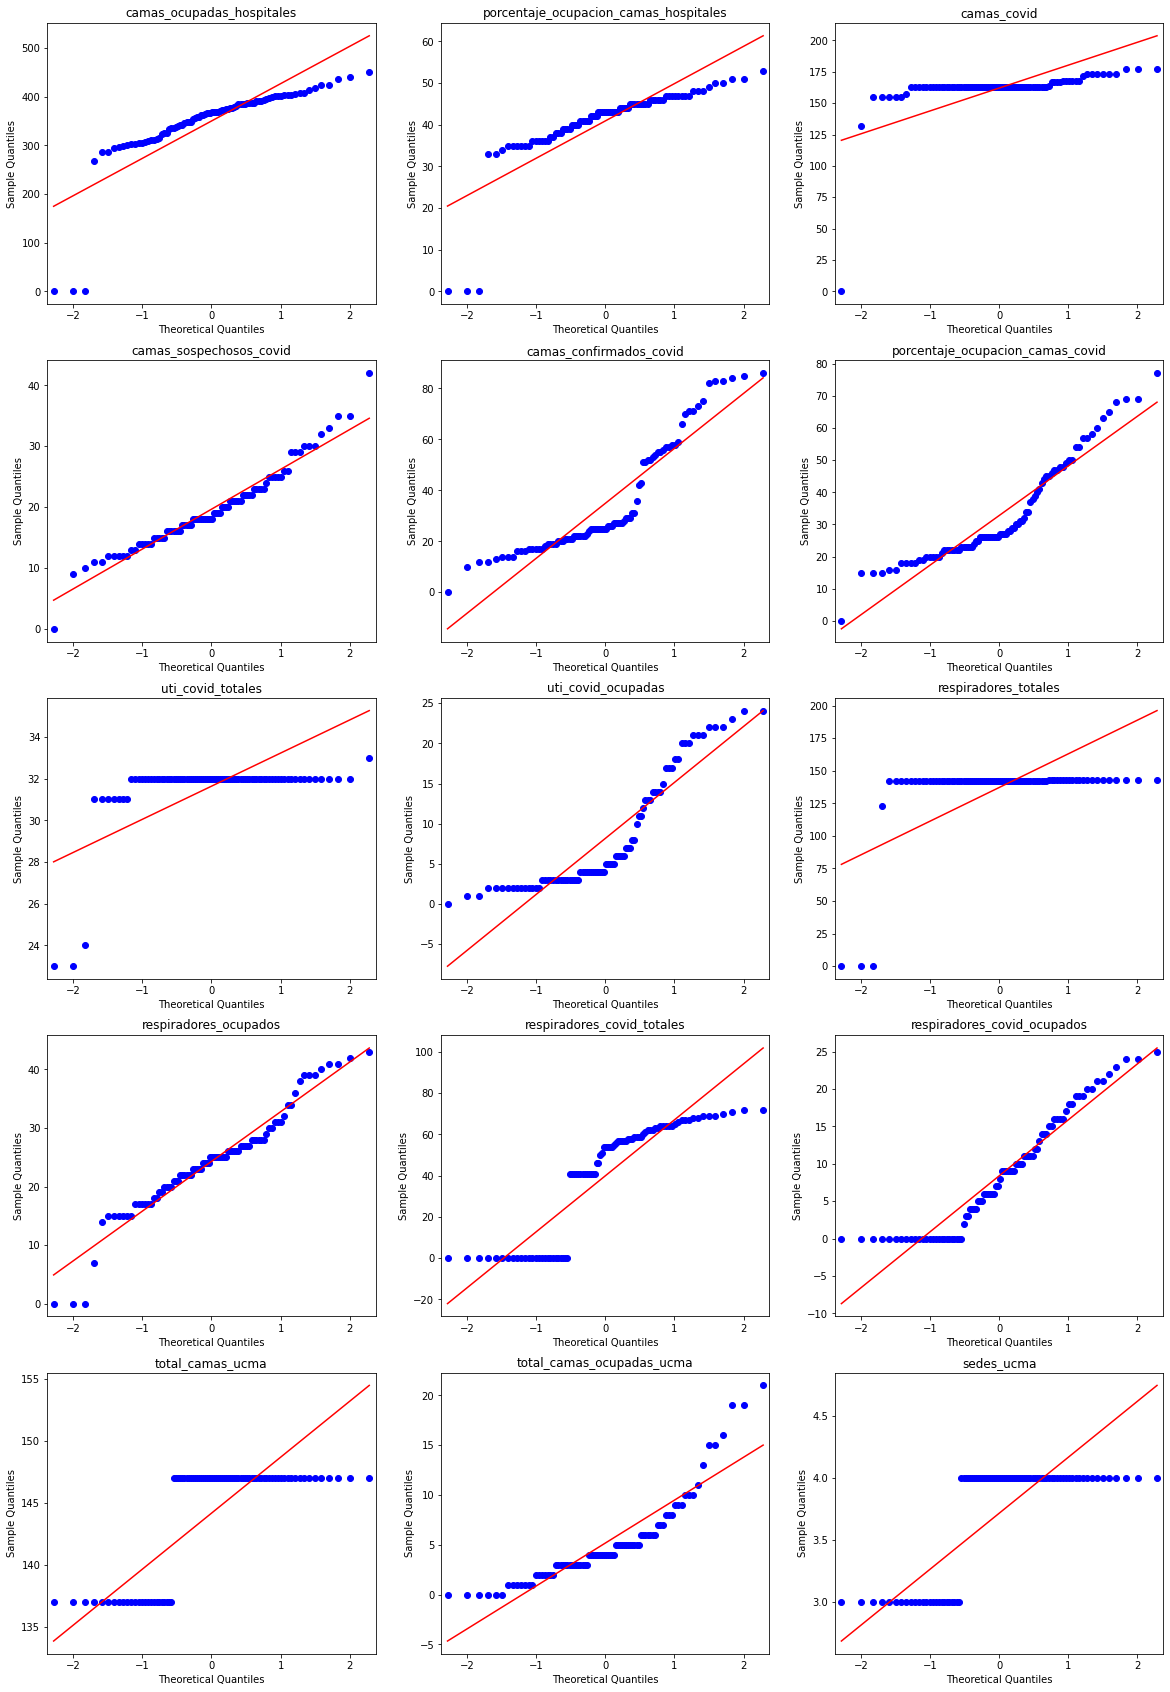

In [277]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

nrow = 5
ncol = 3
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 30))
axs = np.array(axs)
i = 0
 
for ax in axs.reshape(-1):
  feature = subset.columns[i]
  qqplot(subset[feature], ax= ax, line='s')
  ax.set_title(feature)
  i+=1

**Respuesta**

En base a los gráficos de histograma y los qqplot (útiles para evaluar la aproximación de una distribución a la distribución normal), podríamos establecer que algunas variables pueden ser consideradas razonablemente normales: 

*   *camas_sospechosos_covid*
*   *respiradores_ocupados*

En el caso de *respiradores_covid_ocupados*, el qqplot se aproxima a la diagonal (indicando proximidad a distribución normal) en la mayoría de su trazado.

El caso es opuesto para los casos de *total_camas_ucma* y *sedes_ucma* que son variables que toman solamente dos valores.




##### *Hay variables que tienen un comportamiento sospechoso? Por ejemplo, que toman solo dos valores?*

In [278]:
#valores únicos para cada variable
for i in range(len(subset.columns)):
  print(subset.columns[i])
  print(subset[subset.columns[i]].unique(), '\n')


camas_ocupadas_hospitales
[347 386 358 349 343 334 356 404 269 305 294 311 339 367 341 387 368 336
 325 355 375 363 297 374 393 405 287 365 400 366 403 307 315 326 376 338
 312 372 359 313 299 301 382 408 425 396 302 391 402 437 450 440 413 370
 335 398 362 324 309 378   0 286 303 377 388 419 424 373 401] 

porcentaje_ocupacion_camas_hospitales
[40 45 42 41 39 47 37 36 34 43 38 44 35 46 33 48 50 51 53  0 49] 

camas_covid
[155 157 164 167 132 168 177 172 173 163   0] 

camas_sospechosos_covid
[15 12 14 18 16 11 29 26 19 17 22 35 33 30 20 23 10  9 13 21 25 24  0 32
 42] 

camas_confirmados_covid
[10 12 14 13 19 17 22 16 20 25 26 21 18 27 28 29 31 24 23 36 43 51 52 54
 53 55 58 57 42 56 70 59 66 73 71  0 83 75 82 85 86 84] 

porcentaje_ocupacion_camas_covid
[16 15 18 20 22 21 23 29 30 26 25 27 34 32 31 24 28 19 37 38 40 39 44 50
 46 45 41 47 48 43 49 57 54 58  0 60 63 69 65 68 77] 

uti_covid_totales
[32 23 31 24 33] 

uti_covid_ocupadas
[ 1  2  4  3  0  5  6  7  8 12 13 11 14 10 18 17 2

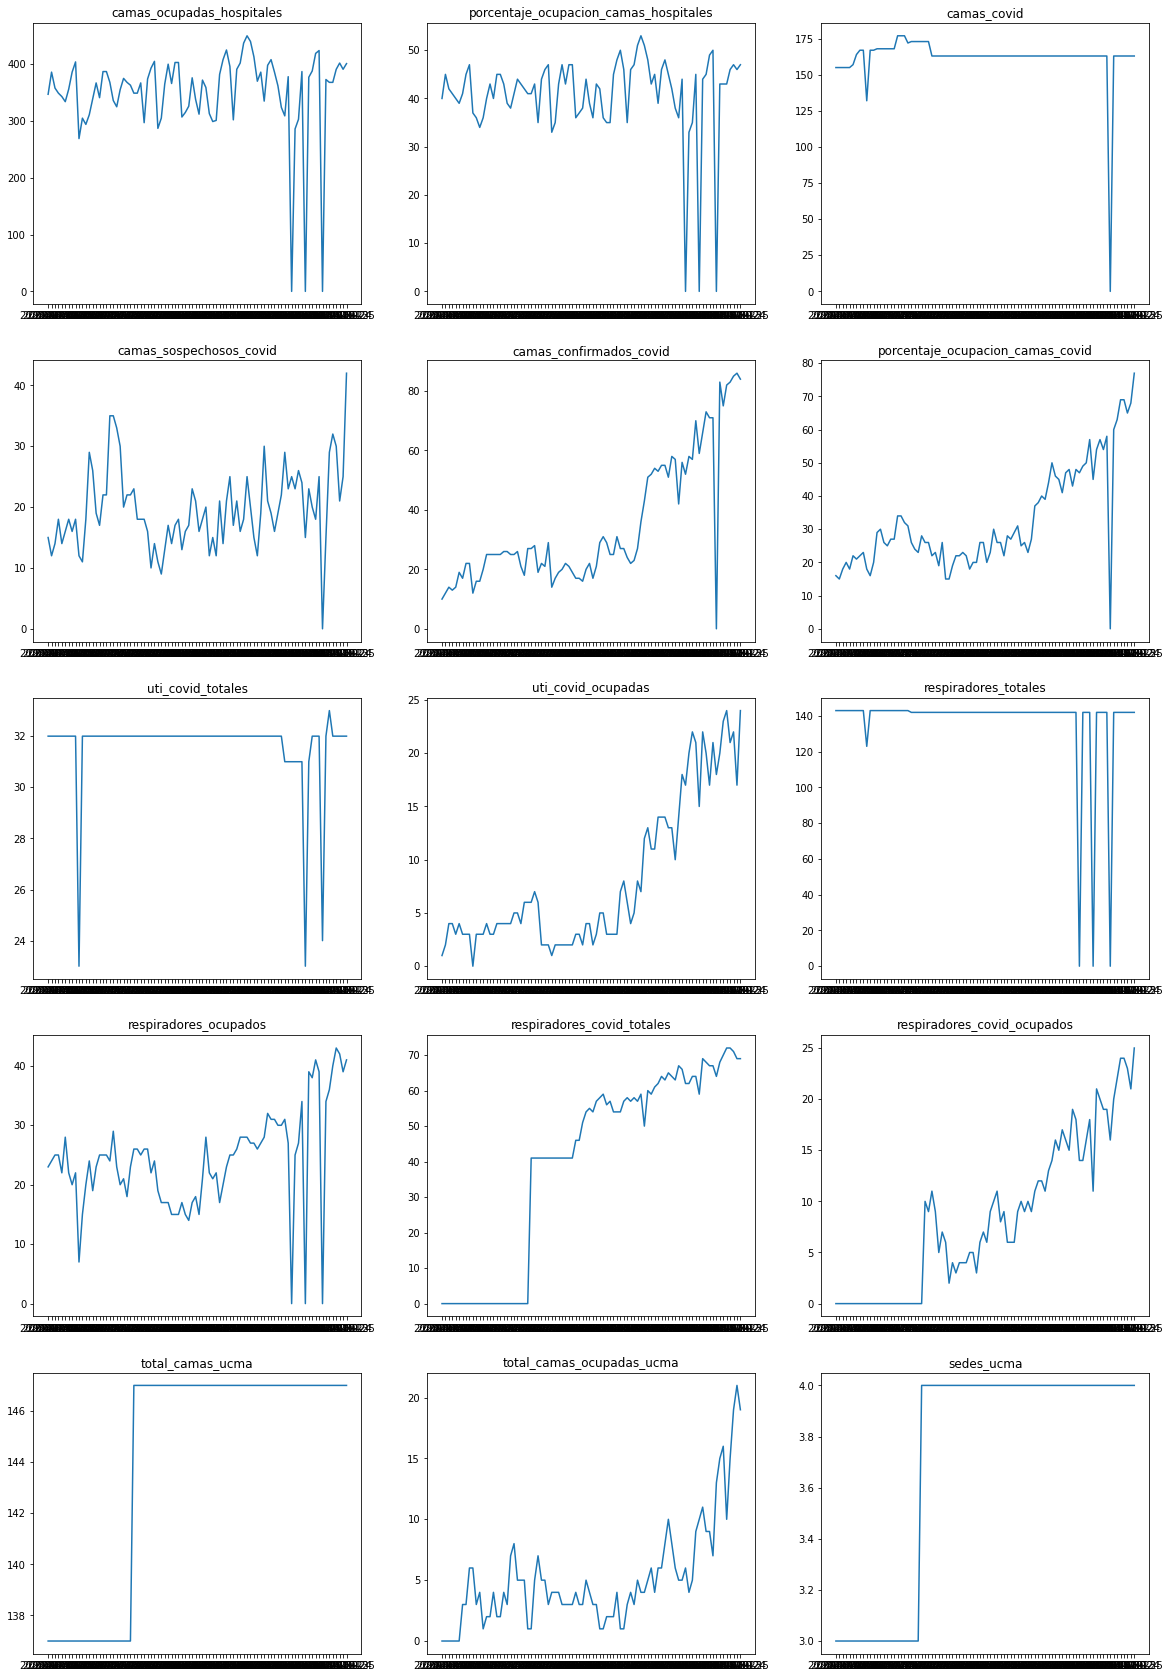

In [279]:
#análisis temporal
nrow = 5
ncol = 3
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 30))
axs = np.array(axs)
i = 0
 
for ax in axs.reshape(-1):
  feature = subset.columns[i]
  ax.plot(data['fecha'], subset[feature])
  ax.set_title(feature)
  i+=1

In [284]:
import numpy as np

for i in range(len(data)):
  if(data['observaciones'][i] is not np.nan):
    print(data['fecha'][i], '--->', data['observaciones'][i])

2020-07-09 ---> No se recibió informe de camas, camas UTI y respiradores del HMALL.
2020-08-01 ---> POR FALTA DE LUZ, EL HMALL NO PUDO INFORMAR OCUPACIÓN
2020-08-02 ---> SIN INFORMACIÓN DEL ESPAÑOL
2020-09-09 ---> Sin información del total de camas y del total de respiradores.
Sin información del hospital HAM
Hospital Penna informó solo COVID.
2020-09-10 ---> Sin información del total de camas y del total de respiradores, el Hospital Penna informó solo COVID.
2020-09-11 ---> Hospital Penna informó solo COVID
2020-09-13 ---> - El Hospital Municipal no brindó información de sectores Covid.
- Por falta de datos informados por algunos hospitales, no se puede informar cantidades totales de camas ni de respiradores.
2020-09-18 ---> Sin información del Hospital Municipal. 
Por falta de datos, sin información de los totales de camas y respiradores. 


**Respuesta:**


*   Hay casos en los que se detecta valores nulos informados para determinadas fechas, lo que se corrobora en la falta de información reportada en la columna de observaciones para determinadas fechas
*   Las variables *sedes_ucma* como *total_camas_ucma*, toman únicamente dos valores, indicando que se dispusieron de 3 o 4 Unidades de Cuidados Mínimos Ambulatorios. Con el incremento de las unidades, incrementó el número de total de camas en ellas de 137 a 147
*   Hay fechas sin informes
*   La variable *respiradores_covid_totales* en su gráfico temporal muestra que a partir de determinada fecha comenzó a requerirse la utilización de ventilación mecánica para estos pacientes (se visualiza un cambio abrupto como un escalón)





#### Dataset casos covid

In [285]:
data = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv')
data = data.sort_values(by=['fecha'])
data.reset_index(inplace=True)
data.head()

,index,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,4,2020-07-04,154,70,78,6,622,31,356,2377,214,0


In [286]:
subset = data.iloc[:, 2:] 
subset.head()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,106,29,71,6,574,23,342,2338,181,0
1,114,31,77,6,581,22,342,2207,172,0
2,124,40,78,6,588,24,356,2162,176,0
3,137,53,78,6,606,31,356,2353,190,0
4,154,70,78,6,622,31,356,2377,214,0


##### *Hay variables que puedan ser razonablemente consideradas normales?*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


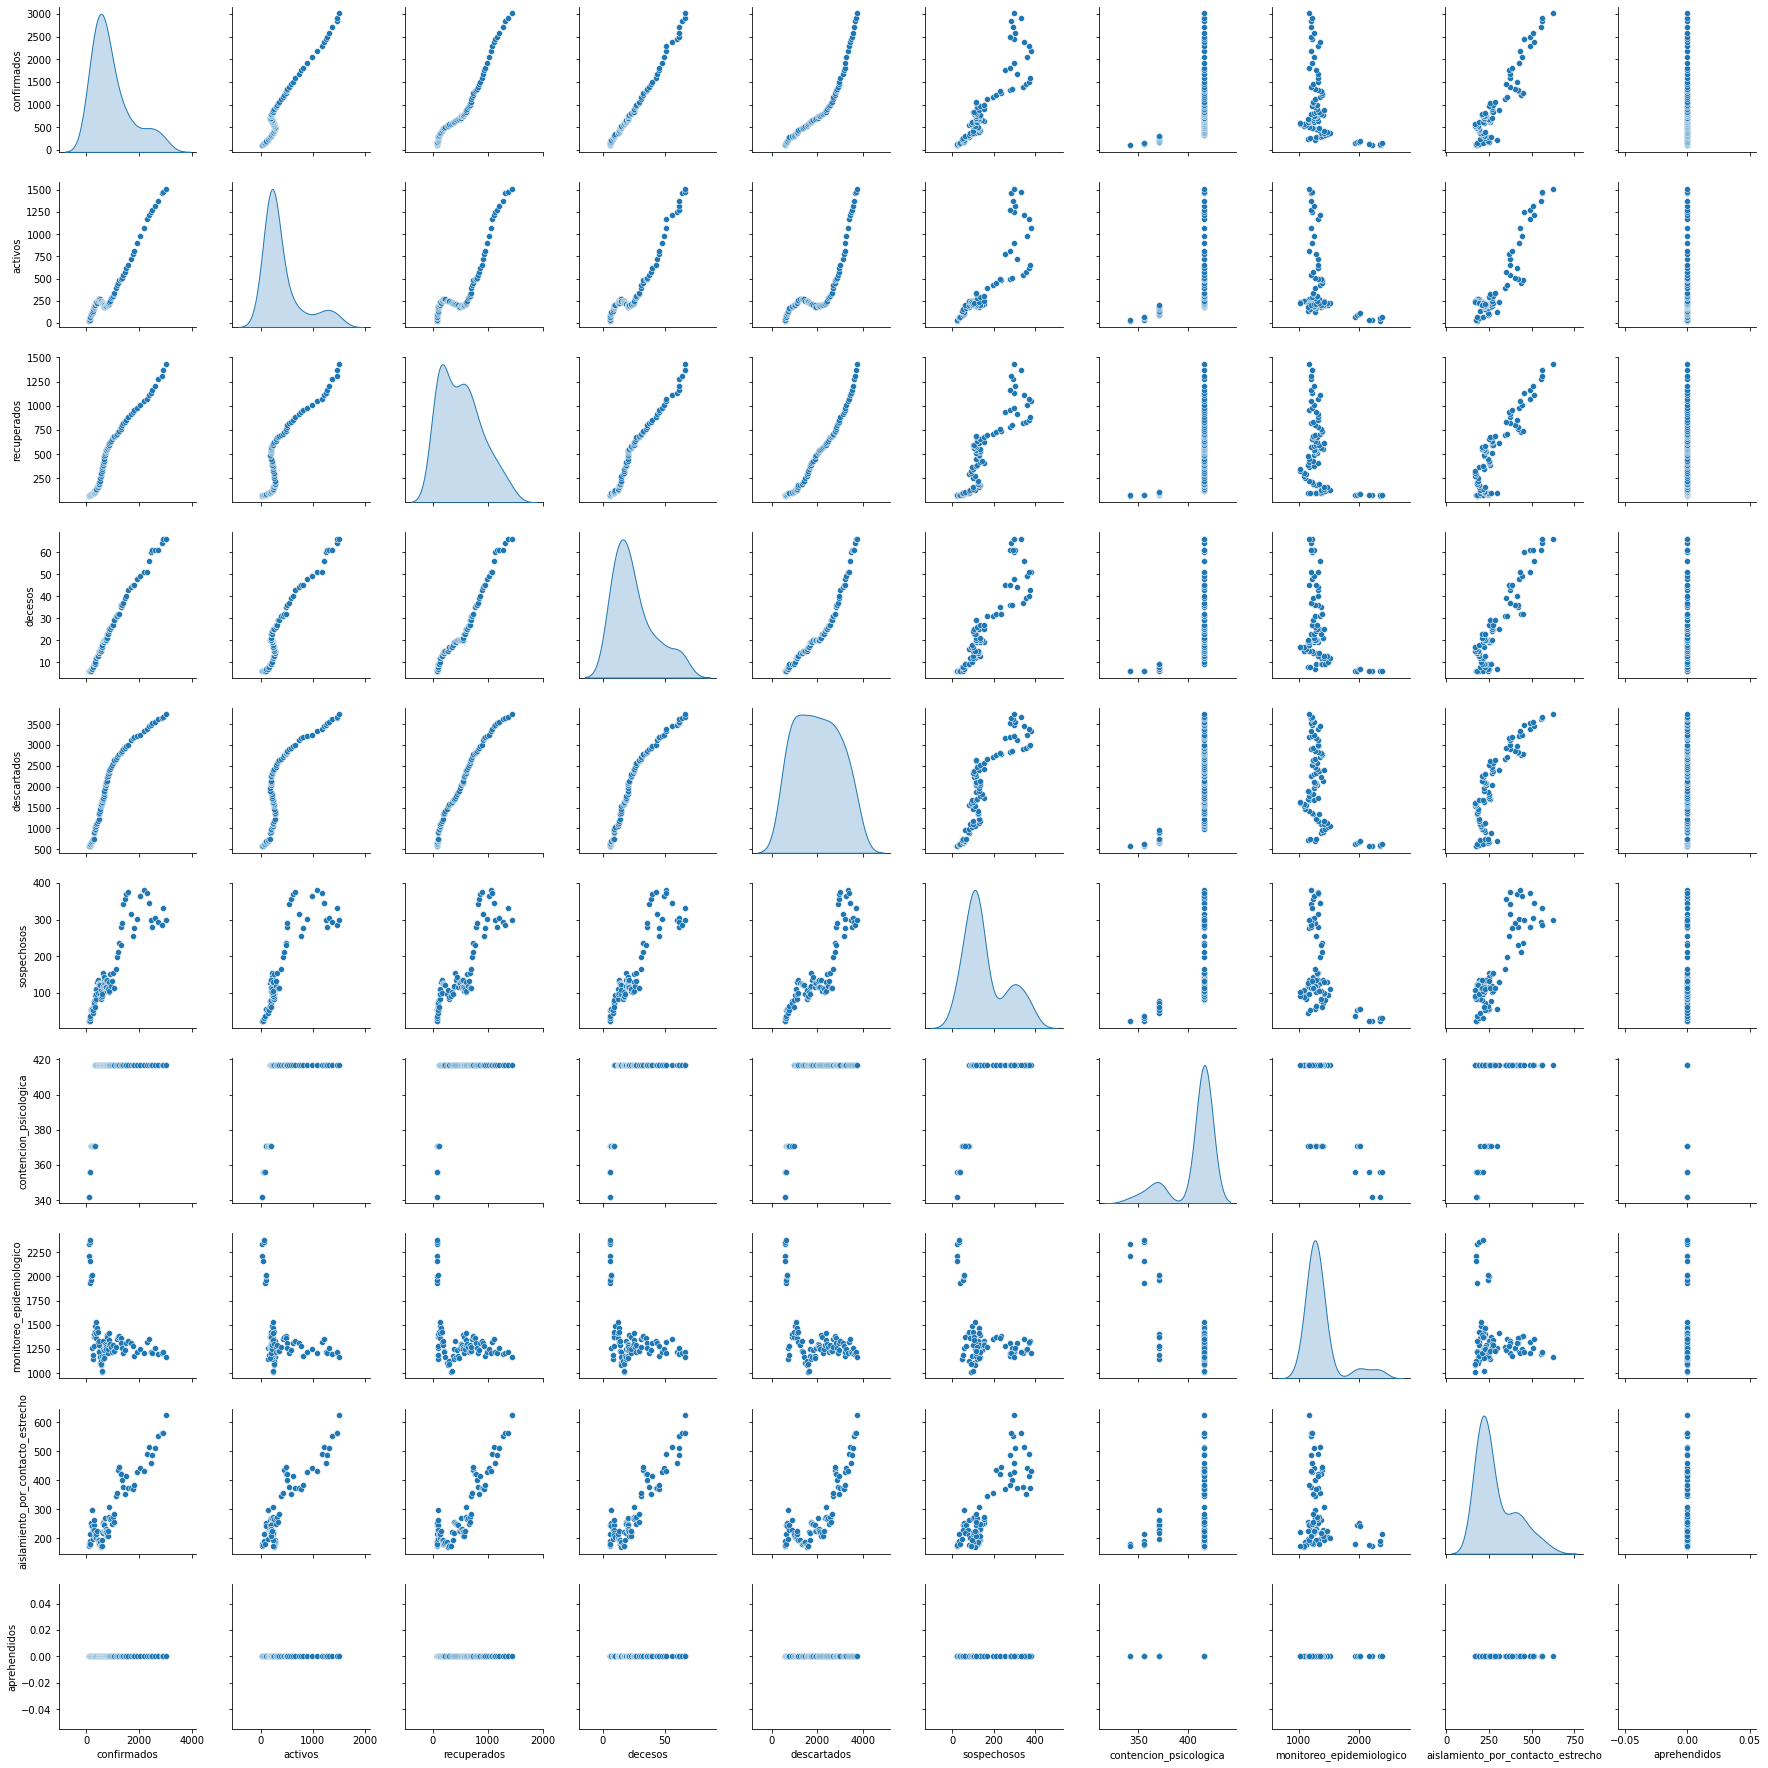

In [287]:
sns.pairplot(subset, diag_kind="kde")


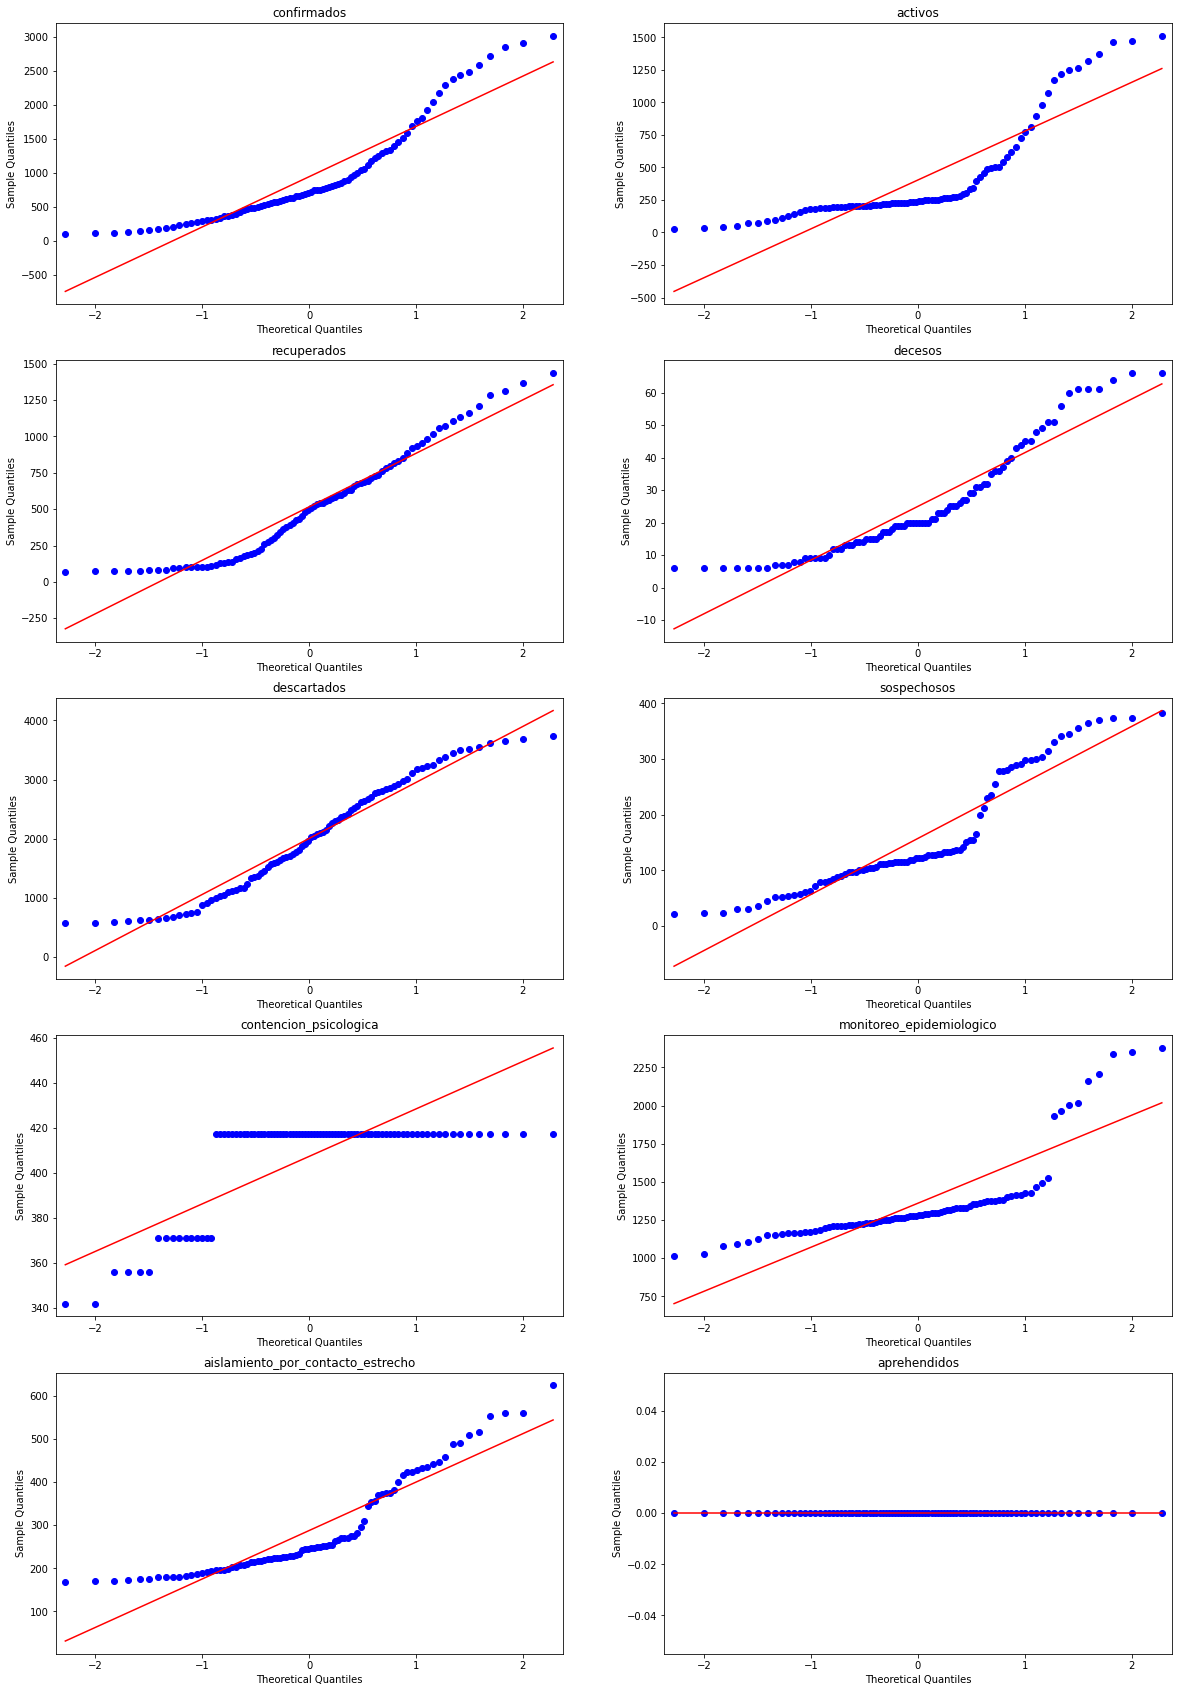

In [288]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

nrow = 5
ncol = 2
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 30))
axs = np.array(axs)
i = 0
 
for ax in axs.reshape(-1):
  feature = subset.columns[i]
  qqplot(subset[feature], ax= ax, line='s')
  ax.set_title(feature)
  i+=1

**Respuesta:**

La variable *descartados* podría ser considerada razonablemente normal, lo cual se condice con el histograma de esta variable que se aproxima a una campana Gaussiana. 

En cierta medida el gráfico qqplot de *recuperados* tiende a la diagonal.

##### *Hay variables que tienen un comportamiento sospechoso? Por ejemplo, que toman solo dos valores?*

In [289]:
for i in range(len(subset.columns)):
  print(subset.columns[i])
  print(subset[subset.columns[i]].unique(), '\n')


confirmados
[ 106  114  124  137  154  159  177  188  209  233  248  265  282  291
  303  315  330  345  371  374  385  401  429  451  467  481  485  496
  508  523  539  552  572  577  588  609  622  625  639  658  662  675
  684  698  715  744  752  755  762  778  791  802  820  839  849  876
  902  942  976 1003 1039 1059 1120 1172 1212 1253 1292 1322 1336 1396
 1449 1510 1586 1687 1755 1811 1926 2041 2177 2291 2378 2440 2487 2589
 2714 2841 2906 3012] 

activos
[  29   31   40   53   70   74   91   97  109  130  141  158  171  178
  189  198  202  208  231  228  233  230  250  261  268  274  267  253
  245  236  227  225  213  212  217  207  185  182  187  199  194  197
  204  205  219  240  249  283  293  303  332  343  394  429  455  486
  493  501  502  541  578  617  658  725  776  809  897  979 1071 1169
 1215 1246 1267 1319 1371 1464 1474 1512] 

recuperados
[  71   77   78   79   80   84   93   96   99  102  104  105  108  119
  127  128  134  140  158  166  177  185  193  1

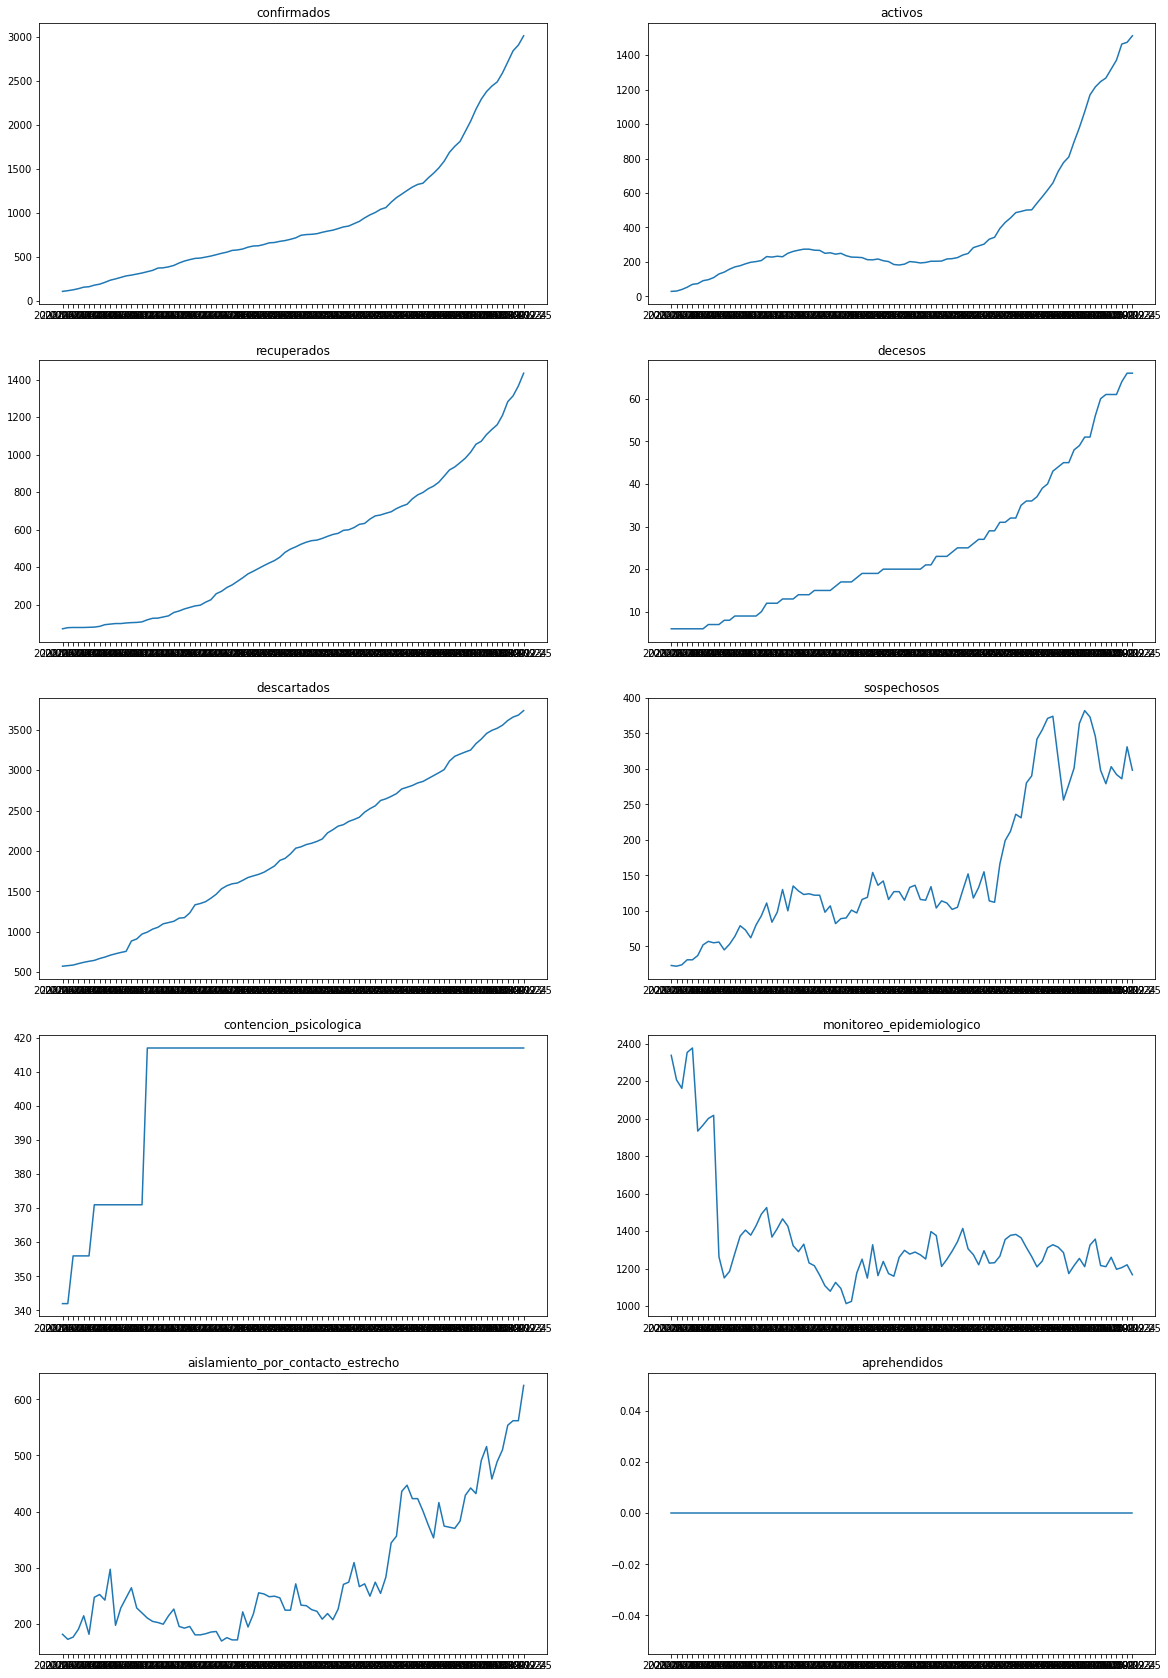

In [290]:
#análisis temporal
nrow = 5
ncol = 2
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 30))
axs = np.array(axs)
i = 0
 
for ax in axs.reshape(-1):
  feature = subset.columns[i]
  ax.plot(data['fecha'], subset[feature])
  ax.set_title(feature)
  i+=1

**Respuesta:**


*   La variable *aprehendidos* toma un valor único e igual a cero
*   Las variables de *confirmados*, *recuperados*, *decesos*, entre otras muestran un comportamiento exponencial que se condice con lo esperado para esta situación epidemiológica. 
*   La variable de *monitoreo_epidemiologico* presenta un decrecimiento a medida que aumentan los casos de enfermedad
 







---


#Ejercicio 2

*Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?*

#### Generación de datasets

In [291]:
# Semilla aletoria
import numpy as np 

np.random.seed(1)
features_number = 1
observations_number = 50

In [292]:
def generate_dataset (mean, std_dev, label):

  dummy_df = pd.DataFrame(np.random.normal(loc = mean, scale= std_dev, size=(observations_number, features_number)),columns=['feature {}'.format(i) for i in range(features_number)])
  dummy_df['Label'] = label
  return dummy_df

In [293]:
#Dataset numero 1
df_1 = generate_dataset(mean=5, std_dev=2, label = 'A')

df_1.head()
df_1.describe()

,feature 0
count,50.000000
mean,4.948970
std,1.958866
min,0.396923
25%,3.618923
50%,4.635736
75%,6.217212
max,9.200510


In [294]:
#Dataset numero 2
df_2 = generate_dataset(mean=0, std_dev=3, label = 'B')

df_2.head()
df_2.describe()

,feature 0
count,50.000000
mean,0.440042
std,2.370883
min,-6.066604
25%,-1.003324
50%,0.557577
75%,2.010539
max,6.556726


In [295]:
#Dataset final
final_df = pd.concat([df_1, df_2], axis=0)
final_df = final_df.sort_values(by=['feature 0'])
final_df.reset_index(inplace=True)

original_df = final_df
final_df.head()



,index,feature 0,Label
0,25,-6.066604,B
1,20,-4.332341,B
2,19,-4.189489,B
3,2,-3.427555,B
4,10,-2.263194,B


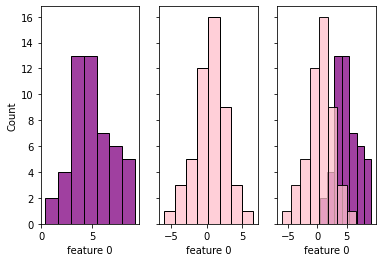

In [296]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.histplot(df_1['feature 0'], color='purple', ax=ax1)
sns.histplot(df_2['feature 0'], color='pink', ax=ax2)
sns.histplot(df_1['feature 0'], color='purple', ax=ax3)
sns.histplot(df_2['feature 0'], color='pink', ax=ax3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


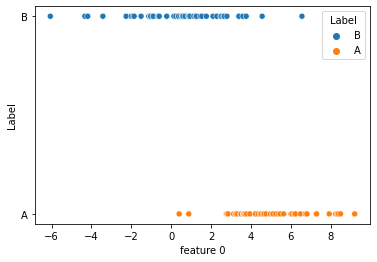

In [297]:
sns.scatterplot(final_df['feature 0'],final_df['Label'], hue=final_df['Label'])

#### Selección de umbral a partir de curva ROC y mínimo error de clasificación

In [298]:
# Grafico de curva ROC con el dataset ordenado

def initial_ROC(df):
  df = df.reset_index()
  x_partition = df['Label'].to_list().count('B')
  y_partition = df['Label'].to_list().count('A')

  x_partition = df['Label'].to_list().count('B')
  y_partition = df['Label'].to_list().count('A')

  roc_point_x = []
  roc_point_y = []
  x = 0
  y = 0

  for i in range (len(df)):
    observation = df['Label'][len(df)-1-i]
    if(observation == 'A'):
      y +=1
      roc_point_y.append(y)
      roc_point_x.append(x)
    
    if (observation == 'B'):
      x+=1
      roc_point_x.append(x)
      roc_point_y.append(y)

  random_model =  np.arange(0, x_partition)

  # Plotting the Graph
  plt.plot(roc_point_x, roc_point_y, color = 'blue')
  plt.plot(random_model, random_model, '--', color='red')
  plt.title("Curve plotted using the given points")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()


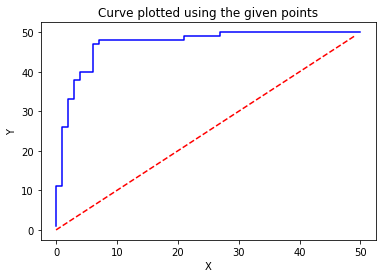

In [299]:
initial_ROC(final_df)

In [300]:
#Obtención del mejor umbral a partir de menor cantidad de errores totales (tanto falsos positivos como falsos negativos)

def get_best_thr(df):
  df['Prediction'] = ''

  for i in range(len(df['feature 0'])):
    thr = df['feature 0'][i]
    
    df.loc[df['feature 0'] <= thr, 'Prediction'] = 'B'
    df.loc[df['feature 0'] > thr, 'Prediction'] = 'A'

    error = len([m for m, n in zip(df['Label'].to_list(), df['Prediction'].to_list()) if m != n])
    if(i == 0):
      best_thr = thr
      best_error = error

    elif(error<=best_error):
      best_thr = thr
      best_error = error

  return best_thr   


In [301]:
best_thr = get_best_thr(final_df)
best_thr

2.793306243910672

In [302]:
final_df.loc[final_df['feature 0'] <= best_thr, ['Prediction']] = 'B'
final_df.loc[final_df['feature 0'] > best_thr, ['Prediction']] = 'A'

#### Métricas de clasificación

In [303]:
def metricas_computo(y_true, y_pred):
    TP = 0
    FN = 0
    TN = 0
    FP = 0

    for i in range(len(y_true)):
      if(y_true[i]=='A' and y_pred[i]=='A'):
        TP +=1
      elif(y_true[i]=='A' and y_pred[i]=='B'):
        FN +=1
      elif(y_true[i]=='B' and y_pred[i]=='A'):
        FP +=1
      elif(y_true[i]=='B' and y_pred[i]=='B'):
        TN +=1
        
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    recall = TP/(TP+FN)
    especificity = TN/(TN+FP)
    precision  = TP/(TP+FP)
    npv = TN/(TN+FN)
    f1 = 2*((precision*recall)/(precision+recall))

    return accuracy, recall, especificity, precision, npv, f1

from sklearn import metrics

def metricas(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred, pos_label='A')
    especificity = metrics.recall_score(y_true, y_pred, pos_label='B')
    precision = metrics.precision_score(y_true, y_pred, pos_label='A')
    npv = metrics.precision_score(y_true, y_pred, pos_label='B')
    f1 = 2*((precision*recall)/(precision+recall))

    return accuracy, recall, especificity, precision, npv, f1

#ROC con sklearn y obtención del área bajo la curva para el cut-off
def ROC(y_true, y_pred):

  y_true = [1 if x=='A' else 0 for x in y_true]
  y_pred = [1 if x=='A' else 0 for x in y_pred]
  fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
  auc = metrics.roc_auc_score(y_true, y_pred)

  ns_probs = [0 for _ in range(len(y_true))]

  plt.plot(fpr, tpr, marker='.', label='(AUC = %0.2f)' %(auc), color = 'blue')
  plt.plot(fpr, fpr, linestyle = '--', color = 'gray')
  plt.xlabel('1 - Especificidad')
  plt.ylabel('Sensibilidad')
  plt.legend(bbox_to_anchor=(1,1))

In [304]:
acc, rec, esp, pre, npv, f1 = metricas_computo(final_df['Label'], final_df['Prediction'])
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

 Exactitud = 0.91 
 Sensibilidad = 0.94 
 Especificidad = 0.88 
 Precisión = 0.89 
 Valor predictivo negativo = 0.94 
 F1 = 0.91 



In [305]:
acc, rec, esp, pre, npv, f1 = metricas(final_df['Label'], final_df['Prediction'])
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

 Exactitud = 0.91 
 Sensibilidad = 0.94 
 Especificidad = 0.88 
 Precisión = 0.89 
 Valor predictivo negativo = 0.94 
 F1 = 0.91 



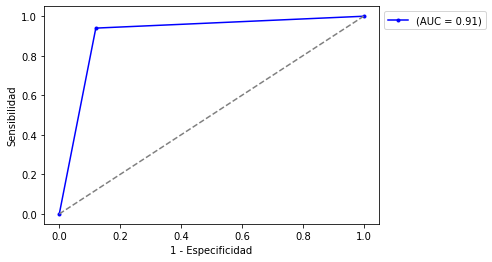

In [306]:
ROC(final_df['Label'], final_df['Prediction'])

#### Otros clasificadores

##### Naive Bayes

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def clf_GNB(df):
  X =  np.asarray(df['feature 0']).reshape((-1,1))
  y = df['Label']
  gnb = GaussianNB()
  y_pred = gnb.fit(X, y).predict(X)

  return y_pred


##### Vecinos cercanos

In [308]:
from sklearn.neighbors import KNeighborsClassifier

def clf_knn(df):
  X =  np.asarray(df['feature 0']).reshape((-1,1))
  y = df['Label']
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X, y)
  y_pred = knn.predict(X)

  return y_pred

##### Regresión Logística 

In [309]:
from sklearn.linear_model import LogisticRegression

def clf_logreg(df):
  X =  np.asarray(df['feature 0']).reshape((-1,1))
  y = df['Label']
  lr = LogisticRegression(random_state=0).fit(X, y)
  y_pred = lr.predict(X)

  return y_pred

In [310]:
y_pred_gnb = clf_GNB(final_df)
y_pred_knn = clf_knn(final_df)
y_pred_logreg = clf_logreg(final_df)

print('Naive Bayes')
acc, rec, esp, pre, npv, f1 = metricas(final_df['Label'], y_pred_gnb)
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

print('Vecinos cercanos')
acc, rec, esp, pre, npv, f1 = metricas(final_df['Label'], y_pred_knn)
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

print('Regresión logística')
acc, rec, esp, pre, npv, f1 = metricas(final_df['Label'], y_pred_logreg)
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

Naive Bayes
 Exactitud = 0.91 
 Sensibilidad = 0.96 
 Especificidad = 0.86 
 Precisión = 0.87 
 Valor predictivo negativo = 0.96 
 F1 = 0.91 

Vecinos cercanos
 Exactitud = 0.93 
 Sensibilidad = 0.96 
 Especificidad = 0.90 
 Precisión = 0.91 
 Valor predictivo negativo = 0.96 
 F1 = 0.93 

Regresión logística
 Exactitud = 0.89 
 Sensibilidad = 0.90 
 Especificidad = 0.88 
 Precisión = 0.88 
 Valor predictivo negativo = 0.90 
 F1 = 0.89 



**Respuesta:**
Podemos notar que en sus configuraciones por default, los clasificadores estudiados presentan buena performance, especialmente el de vecinos cercanos que considerando tres puntos vecinos logra mejorar todas las métricas evaluadas. 

#### Variaciones sobre datasets y umbrales

**CASO #1**: distribuciones próximas (mismas medias, doble desviación estándar)

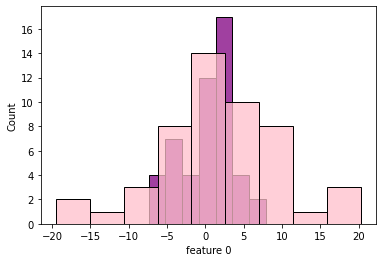

In [311]:
#Dataset numero 1
df_1_1 = generate_dataset(mean=0, std_dev=4, label = 'A')

#Dataset numero 2
df_2_1 = generate_dataset(mean=0, std_dev=8, label = 'B')

#Dataset final
final_df_1 = pd.concat([df_1_1, df_2_1], axis=0)
final_df_1 = final_df_1.sort_values(by=['feature 0'])
final_df_1.reset_index(inplace=True)

fig, ax = plt.subplots()
sns.histplot(df_1_1['feature 0'], color='purple')
sns.histplot(df_2_1['feature 0'], color='pink')


In [312]:
best_thr= get_best_thr(final_df_1)
final_df_1.loc[final_df_1['feature 0'] <= best_thr, ['Prediction']] = 'B'
final_df_1.loc[final_df_1['feature 0'] > best_thr, ['Prediction']] = 'A'  

acc, rec, esp, pre, npv, f1 = metricas(final_df_1['Label'], final_df_1['Prediction'])
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

 Exactitud = 0.56 
 Sensibilidad = 1.00 
 Especificidad = 0.12 
 Precisión = 0.53 
 Valor predictivo negativo = 1.00 
 F1 = 0.69 



**CASO #2**: distribuciones próximas y con superposición parcial (distintas medias, misma desviación estándar)

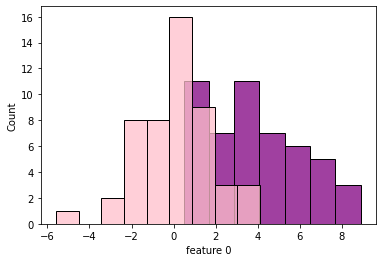

In [313]:
#Dataset numero 1
df_1_2 = generate_dataset(mean=4, std_dev=2, label = 'A')

#Dataset numero 2
df_2_2 = generate_dataset(mean=0, std_dev=2, label = 'B')

#Dataset final
final_df_2 = pd.concat([df_1_2, df_2_2], axis=0)
final_df_2 = final_df_2.sort_values(by=['feature 0'])
final_df_2.reset_index(inplace=True)

fig, ax = plt.subplots()
sns.histplot(df_1_2['feature 0'], color='purple')
sns.histplot(df_2_2['feature 0'], color='pink')


In [314]:
best_thr= get_best_thr(final_df_2)
final_df_2.loc[final_df_2['feature 0'] <= best_thr, ['Prediction']] = 'B'
final_df_2.loc[final_df_2['feature 0'] > best_thr, ['Prediction']] = 'A'  

acc, rec, esp, pre, npv, f1 = metricas(final_df_2['Label'], final_df_2['Prediction'])
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

 Exactitud = 0.85 
 Sensibilidad = 0.94 
 Especificidad = 0.76 
 Precisión = 0.80 
 Valor predictivo negativo = 0.93 
 F1 = 0.86 



**CASO #3**: distribuciones alejadas (medias muy separadas y desvio estándar bajo para tener distribuciones espigadas)

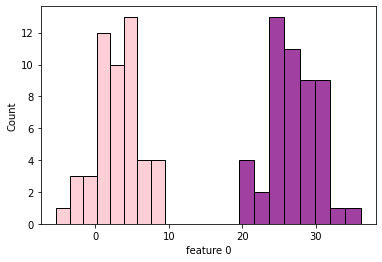

In [315]:
#Dataset numero 1
df_1_3 = generate_dataset(mean=27, std_dev=3, label = 'A')

#Dataset numero 2
df_2_3 = generate_dataset(mean=3, std_dev=3, label = 'B')

#Dataset final
final_df_3 = pd.concat([df_1_3, df_2_3], axis=0)
final_df_3 = final_df_3.sort_values(by=['feature 0'])
final_df_3.reset_index(inplace=True)

fig, ax = plt.subplots()
sns.histplot(df_1_3['feature 0'], color='purple')
sns.histplot(df_2_3['feature 0'], color='pink')


In [316]:
best_thr= get_best_thr(final_df_3)
final_df_3.loc[final_df_3['feature 0'] <= best_thr, ['Prediction']] = 'B'
final_df_3.loc[final_df_3['feature 0'] > best_thr, ['Prediction']] = 'A'  

acc, rec, esp, pre, npv, f1 = metricas(final_df_3['Label'], final_df_3['Prediction'])
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

 Exactitud = 1.00 
 Sensibilidad = 1.00 
 Especificidad = 1.00 
 Precisión = 1.00 
 Valor predictivo negativo = 1.00 
 F1 = 1.00 



**Respuesta:**

Observamos que a medida que las distribuciones se alejan entre sí, es más sencilla la definición de un umbral que permita diferenciar entre clases, siendo el caso óptimo cuando las mismas se encuentran completamente separadas. A medida que estas se aproximan, la tarea resulta menos trivial y adquiere una complejidad mucho mayor cuando las mismas se encuentran superpuestas. Esto puede distinguirse en la disminución del desempeño de los clasificadores computado a partir de las métricas. 

**CASO #4**: tomamos las distribuciones parcialmente superpuestas (CASO #2) y modificamos el mejor umbral obtenido, seleccionando forzosamente un umbral menor (un cuarto del mejor umbral computado con el análisis de la curva ROC)

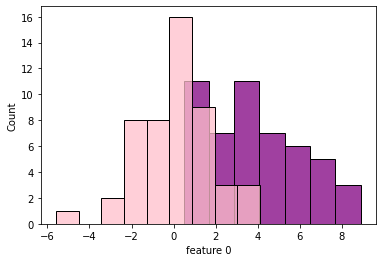

In [317]:
#Dataset final
final_df_4 = final_df_2

fig, ax = plt.subplots()
sns.histplot(df_1_2['feature 0'], color='purple')
sns.histplot(df_2_2['feature 0'], color='pink')


In [318]:
best_thr= get_best_thr(final_df_4)
best_thr

1.1718208622052313

In [319]:
best_thr= best_thr/4 #la mitad del mejor umbral 
final_df_4.loc[final_df_4['feature 0'] <= best_thr, ['Prediction']] = 'B'
final_df_4.loc[final_df_4['feature 0'] > best_thr, ['Prediction']] = 'A'  

acc, rec, esp, pre, npv, f1 = metricas(final_df_4['Label'], final_df_4['Prediction'])
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

 Exactitud = 0.77 
 Sensibilidad = 1.00 
 Especificidad = 0.54 
 Precisión = 0.68 
 Valor predictivo negativo = 1.00 
 F1 = 0.81 



**CASO #5**: tomamos las distribuciones parcialmente superpuestas (CASO #2) y modificamos el mejor umbral obtenido, seleccionando forzosamente un umbral mayor (dos veces el mejor umbral computado con el análisis de la curva ROC)

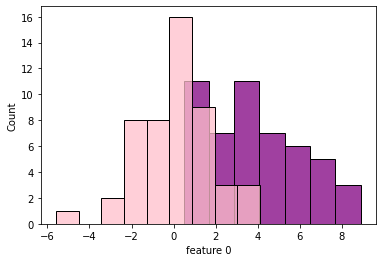

In [331]:
#Dataset final
final_df_5 = final_df_2

fig, ax = plt.subplots()
sns.histplot(df_1_2['feature 0'], color='purple')
sns.histplot(df_2_2['feature 0'], color='pink')


In [332]:
best_thr= get_best_thr(final_df_5)
best_thr

1.1718208622052313

In [333]:
best_thr= 2* best_thr
final_df_5.loc[final_df_5['feature 0'] <= best_thr, ['Prediction']] = 'B'
final_df_5.loc[final_df_5['feature 0'] > best_thr, ['Prediction']] = 'A'  

acc, rec, esp, pre, npv, f1 = metricas(final_df_5['Label'], final_df_5['Prediction'])
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

 Exactitud = 0.80 
 Sensibilidad = 0.72 
 Especificidad = 0.88 
 Precisión = 0.86 
 Valor predictivo negativo = 0.76 
 F1 = 0.78 



**Respuesta:**

Se observa que la modificación en el valor umbral provoca una alteración de las métricas del clasificador. 

En particular, la disminución del umbral vuelve al clasificador más sensible (permitiéndole la detección de más casos "A" en este problema), aunque menos específico; mientras que el aumento del umbral vuelve al clasificador más específico (incrementando la tasa de detección de casos "B") pero menos sensible a los casos "A".

Así mismo, podemos notar que las métricas globales como son exactitud y F1, disminuyen en la medida en que nos alejamos del umbral óptimo dado que son métricas que combinan los resultados sobre más de una clase. Con lo anterior nos referimos a que sensibilidad sólo computa el impacto sobre la clase "A" (TP, FN), especificidad sólo sobre la clase "B" (TN, FP); mientras que exactitud considera TP, FN, TN, FP, y el F1 al tener en cuenta sensibilidad y precisión se basa en TP, FN, FP. 

#### ¿Cómo automatizar el proceso de encontrar el mejor umbral?

Anteriormente, buscamos el umbral óptimo para un clasificador por mínimo error, tratando de manera indiscriminada a los falsos positivos y a los falsos negativos bajo una misma categoría de "falso". Sin embargo, en la mayoría de las situaciones reales no es indistinto cometer falsos positivos (error tipo I) que falsos negativos (error tipo II). 

Por ejemplo, en un clasificador que pretendiera funcionar como un test diagnóstico de cáncer, se considera mucho más grave cometer un falso negativo (el paciente tiene cáncer y el clasificador dice que no lo tiene, por lo cual podrían no realizarse más estudios ni seguimiento del mismo) que cometer un falso positivo (el paciente no tiene cáncer pero el clasificador indica que sí, lo cual posiblemente derivará en una próxima consulta con un especialista). 

In [323]:
#Definimos una función para computar el mejor umbral a partir del F1 score

def get_best_thr_F1(df):
  df['Prediction'] = ''

  for i in range(len(df['feature 0'])):
    thr = df['feature 0'][i]
    
    df.loc[df['feature 0'] <= thr, 'Prediction'] = 'B'
    df.loc[df['feature 0'] > thr, 'Prediction'] = 'A'

    recall = metrics.recall_score(df['Label'], df['Prediction'], pos_label='A')
    precision = metrics.precision_score(df['Label'], df['Prediction'], pos_label='A')
    f1 = 2*((precision*recall)/(precision+recall))

    if(i == 0):
      best_thr = thr
      best_f1 = f1

    elif(f1>=best_f1):
      best_thr = thr
      best_f1 = f1

  return best_thr   

#Definimos una función para computar el mejor umbral a partir del Youden Index

def get_best_thr_YI(df):
  df['Prediction'] = ''

  for i in range(len(df['feature 0'])):
    thr = df['feature 0'][i]
    
    df.loc[df['feature 0'] <= thr, 'Prediction'] = 'B'
    df.loc[df['feature 0'] > thr, 'Prediction'] = 'A'

    recall = metrics.recall_score(df['Label'], df['Prediction'], pos_label='A')
    specificity = metrics.recall_score(df['Label'], df['Prediction'], pos_label='B')
    yi = recall + specificity -1

    if(i == 0):
      best_thr = thr
      best_yi = yi

    elif(yi>=best_yi):
      best_thr = thr
      best_yi = yi

  return best_thr 


#Definimos una función para computar el mejor umbral a partir del Jaccard Index (JI) o IoU

def get_best_thr_IoU(df):
  df['Prediction'] = ''

  for i in range(len(df['feature 0'])):
    thr = df['feature 0'][i]
    
    df.loc[df['feature 0'] <= thr, 'Prediction'] = 'B'
    df.loc[df['feature 0'] > thr, 'Prediction'] = 'A'

    iou = metrics.jaccard_score(df['Label'], df['Prediction'], pos_label='A')

    if(i == 0):
      best_thr = thr
      best_iou = iou

    elif(iou>=best_iou):
      best_thr = thr
      best_iou = iou

  return best_thr 


In [324]:
best_thr_err = get_best_thr(original_df)
best_thr_f1 = get_best_thr_F1(original_df)
best_thr_YI = get_best_thr_YI(original_df)
best_thr_IoU = get_best_thr_IoU(original_df)

#Mejor umbral a partir del menor error de clasificación
original_df.loc[original_df['feature 0'] <= best_thr_err, ['Prediction']] = 'B'
original_df.loc[original_df['feature 0'] > best_thr_err, ['Prediction']] = 'A'  
acc, rec, esp, pre, npv, f1 = metricas(original_df['Label'], original_df['Prediction'])

print('Umbral seleccionado por mínimo error:', best_thr_err)
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

#Mejor umbral a partir del mejor F1 score
original_df.loc[original_df['feature 0'] <= best_thr_f1, ['Prediction']] = 'B'
original_df.loc[original_df['feature 0'] > best_thr_f1, ['Prediction']] = 'A'  
acc, rec, esp, pre, npv, f1 = metricas(original_df['Label'], original_df['Prediction'])

print('Umbral seleccionado por mejor F1:', best_thr_f1)
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

#Mejor umbral a partir del mejor YI
original_df.loc[original_df['feature 0'] <= best_thr_YI, ['Prediction']] = 'B'
original_df.loc[original_df['feature 0'] > best_thr_YI, ['Prediction']] = 'A'  
acc, rec, esp, pre, npv, f1 = metricas(original_df['Label'], original_df['Prediction'])

print('Umbral seleccionado por mejor índice de Youden:', best_thr_YI)
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))

#Mejor umbral a partir del mejor IoU o índice de Jaccard
original_df.loc[original_df['feature 0'] <= best_thr_IoU, ['Prediction']] = 'B'
original_df.loc[original_df['feature 0'] > best_thr_IoU, ['Prediction']] = 'A'  
acc, rec, esp, pre, npv, f1 = metricas(original_df['Label'], original_df['Prediction'])

print('Umbral seleccionado por mejor IoU o índice de Jaccard:', best_thr_IoU)
print(' Exactitud = %.2f \n Sensibilidad = %.2f \n Especificidad = %.2f \n Precisión = %.2f \n Valor predictivo negativo = %.2f \n F1 = %.2f \n'%(acc,rec,esp,pre,npv,f1))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Umbral seleccionado por mínimo error: 2.793306243910672
 Exactitud = 0.91 
 Sensibilidad = 0.94 
 Especificidad = 0.88 
 Precisión = 0.89 
 Valor predictivo negativo = 0.94 
 F1 = 0.91 

Umbral seleccionado por mejor F1: 2.6554234928121843
 Exactitud = 0.91 
 Sensibilidad = 0.96 
 Especificidad = 0.86 
 Precisión = 0.87 
 Valor predictivo negativo = 0.96 
 F1 = 0.91 

Umbral seleccionado por mejor índice de Youden: 2.793306243910672
 Exactitud = 0.91 
 Sensibilidad = 0.94 
 Especificidad = 0.88 
 Precisión = 0.89 
 Valor predictivo negativo = 0.94 
 F1 = 0.91 

Umbral seleccionado por mejor IoU o índice de Jaccard: 2.6554234928121843
 Exactitud = 0.91 
 Sensibilidad = 0.96 
 Especificidad = 0.86 
 Precisión = 0.87 
 Valor predictivo negativo = 0.96 
 F1 = 0.91 



**Respuesta**:

Para la realización de este ejercicio probamos distintas maneras de obtener el mejor umbral. 

Con las funciones *get_best_thr, get_best_thr_f1, get_best_thr_F1, get_best_thr_YI, get_best_thr_IoU* lo que hicimos fue tomar todo el dataset de manera ordenada en base a *feature 0* e ir probando como umbral todos los valores que esta variable asume. A partir de ello, predecimos como clase "B" a los valores iguales o inferiores al umbral y como clase "A" a los valores superiores a éste. Con ello  computamos para cada valor del umbral el error de clasificación, el valor F1, el índice de Youden o el índice de Jaccard, dependiendo de la función utilizada. De esta manera, nos quedamos con el umbral que provoca el mínimo error o el valor máximo para el caso de las restantes métricas.

La razón por la cual decidimos probar distintos criterios para elegir el mejor umbral es porque la elección dependerá en gran medida del problema a resolver y la implicancia de cometer errores tipo I o tipo II para ese caso particular, como se explicó anteriormente. 

Además, en la primera parte de este ejercicio también probamos clasificadores de la librería sklearn, logrando resultados similares. En dichos casos, no requerimos realizar predicciones para cada valor de umbral, sino que los clasificadores see ajustan en el proceso de entrenamiento a los datos. Este ajuste nos da un modelo que nos permite hacer predicciones y con las predicciones obtenidas luego es posible buscar el mejor valor umbral. 

